In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n = 1500
k = 6

l_x,l_y = [],[]
for i in range(n):
    l_x.append(random.uniform(0,1))
    l_y.append(random.uniform(0,1))

array = np.array([[l_x[i],l_y[i]] for i in range(n)])
# array = np.random.rand(5,2)

In [3]:
def euclidean_distance(x1,y1, x2,y2):
    return ((x1-x2)**2 + (y1-y2)**2 )**0.5

def visualisation(centroids_x,centroids_y,clusters_x=[],clusters_y=[]):
    x = np.linspace(0,1,n)
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    
    s = "o"
    if len(clusters_x)==1: s = "oy"

    for i in range(len(clusters_x)):
        plt.plot(clusters_x[i],clusters_y[i],s,markersize=4)
    plt.plot(centroids_x,centroids_y,"xk",markersize=20)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

In [4]:
def k_means(n,k,l_x,l_y):
    centroids_x, centroids_y = [],[]
    for i in range(k):
        x,y = l_x[random.randint(0,n)],l_y[random.randint(0,n)]
        centroids_x.append(x)
        centroids_y.append(y)

    visualisation(centroids_x,centroids_y, [l_x],[l_y])
    
    c_x,c_y = centroids_x[0:], centroids_y[0:]
    cl_x,cl_y = [],[]

    difference = 1
    while difference != 0:

        clusters_x = []
        clusters_y = []
        for i in range(k):
            clusters_x.append([])
            clusters_y.append([])
        
        for i in range(n):
            dist_min = 10
            closest_centroid = 0
            for j in range(k):
                current_dist = euclidean_distance(l_x[i],l_y[i], centroids_x[j],centroids_y[j])
                if current_dist < dist_min:
                    dist_min = current_dist
                    closest_centroid = j
            clusters_x[closest_centroid].append(l_x[i])
            clusters_y[closest_centroid].append(l_y[i])

        # we need to find a new centroid in every cluster
        for i in range(k):
            centroid = 0 # number of current centroid in the current cluster
            min_max_dist = 10
            for j in range(len(clusters_x[i])):
                max_dist = 0
                for q in range(len(clusters_x[i])):
                    dist = euclidean_distance(clusters_x[i][j],clusters_y[i][j], clusters_x[i][q],clusters_y[i][q])
                    if dist > max_dist: max_dist = dist
                        
                if max_dist < min_max_dist:
                    min_max_dist = max_dist
                    centroid = j
            centroids_x[i] = clusters_x[i][centroid]
            centroids_y[i] = clusters_y[i][centroid]
            
        if c_x == centroids_x and c_y == centroids_y and cl_x == clusters_x and cl_y == clusters_y: difference = 0
        c_x,c_y = centroids_x[0:], centroids_y[0:]
        cl_x,cl_y = clusters_x[0:],clusters_y[0:]

    average_l = []
    for i in range(k):
        av = 0
        for j in range(len(clusters_x[i])):
            for q in range(len(clusters_x[i])):
                av += euclidean_distance(clusters_x[i][j],clusters_y[i][j], clusters_x[i][q],clusters_y[i][q])
        average_l.append( av/ (len(clusters_x[i])*(len(clusters_x[i])-1 ) ))
    average = sum(average_l)/k
    
    visualisation(centroids_x,centroids_y,clusters_x,clusters_y)
    print("середнє значення середніх відстаней між двома рандомними точками кожного кластера")
    print(average)
#k_means(n,k,l_x,l_y)

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

def hierarchical_clustering(k,array):
    cluster = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    cluster.fit_predict(array)
    plt.scatter(array[:,0],array[:,1], c=cluster.labels_, cmap='rainbow',s = 12)
    plt.show()

    labels = cluster.labels_

    weighted_distances = []
    s = 0
    for i in range(k):
        cluster_points = array[labels == i]
        distances = pairwise_distances(cluster_points)
        weighted_distance = np.sum(distances) / (len(cluster_points) * (len(cluster_points) - 1))
        weighted_distances.append(weighted_distance)
        s += weighted_distance

    print("середнє значення середніх відстаней між двома рандомними точками кожного кластера")
    print(s/k)
    
#hierarchical_clustering(k,array)

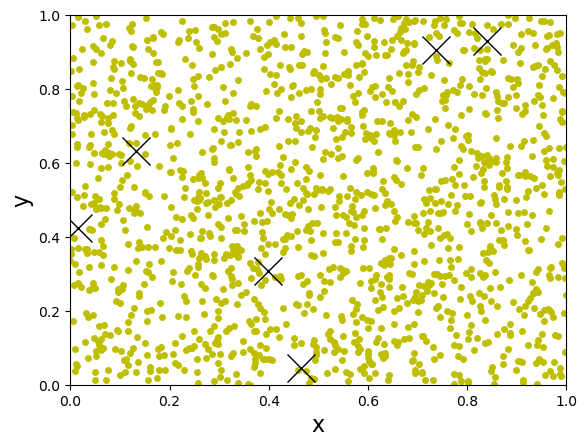

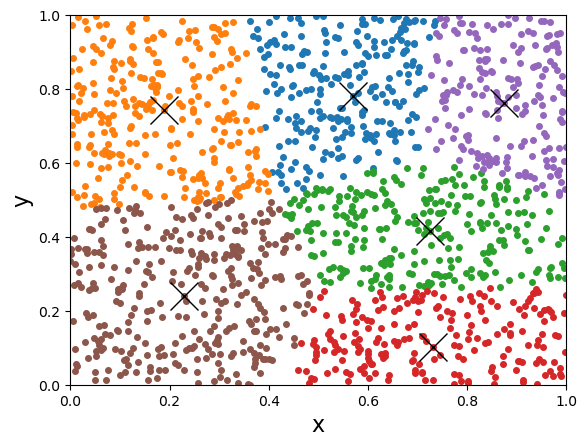

середнє значення середніх відстаней між двома рандомними точками кожного кластера
0.21938339236043125




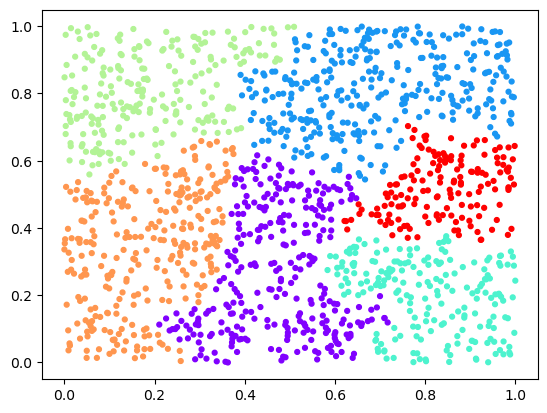

середнє значення середніх відстаней між двома рандомними точками кожного кластера
0.22492536478564176


In [6]:

k_means(n,k,l_x,l_y)
print("\n")
hierarchical_clustering(k,array)